## Titanic Survival Analysis

## 1. Importing the libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Collecting the data

In [2]:
#Importing the dataset
train_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

### 3. Exploratory Data Analysis(EDA)

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.shape

(891, 12)

In [6]:
test_data.shape

(418, 11)

In [7]:
train_data.info()
print('----------------------------------')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null objec

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train_data.columns
# df.axes  # The axes can also be used for the same

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

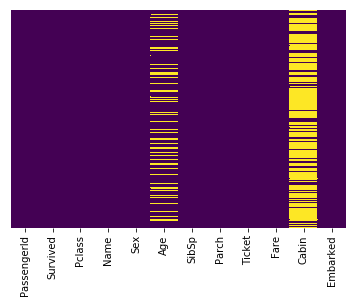

In [13]:
#Plot for checking the missing values from training set
sns.heatmap(train_data.isnull(), yticklabels=False,cbar=False, cmap='viridis')

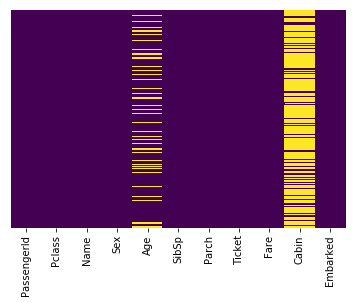

In [14]:
#Plot for checking the missing values from test set
sns.heatmap(test_data.isnull(), yticklabels=False,cbar=False, cmap='viridis')

**The heatmap visualization clearly shows that there are a fair amount of data missing in Age column and Cabin column**

In [15]:
# Style of the seaborn for the plots 
sns.set_style('whitegrid')

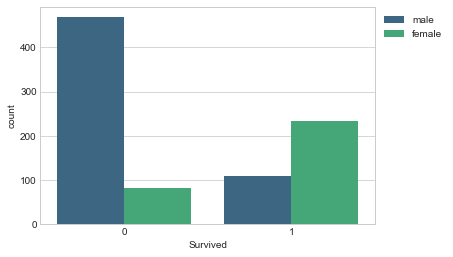

In [16]:
# Checking the Survival ratio and also of different Sex
sns.countplot(x='Survived', data=train_data, hue='Sex', palette='viridis')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

**Here 0 means not Survived and 1 means Survived**

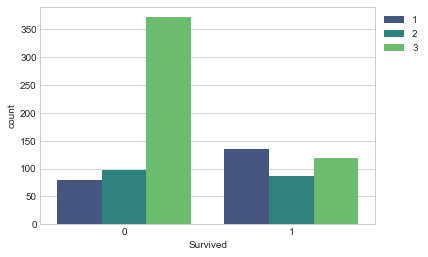

In [17]:
# Checking the Survival ratio and also of different classes of people
sns.countplot(x='Survived', data=train_data, hue='Pclass', palette='viridis')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

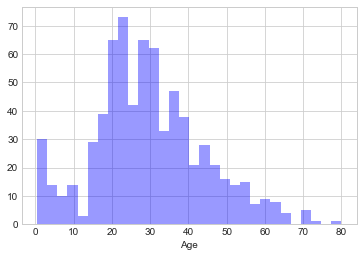

In [18]:
#Checking the age group of the people onboard
sns.distplot(train_data['Age'].dropna(), bins=30, kde=False, color='blue')

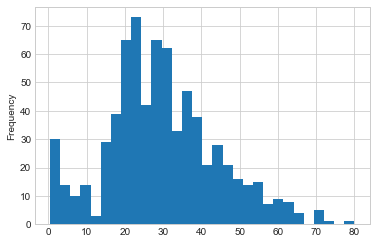

In [19]:
#Checking the age group of the people onboard with built-in plot of pandas
train_data['Age'].plot.hist(bins=30)

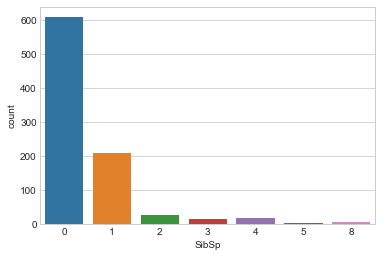

In [20]:
# Checking the Sibilings and Spouses onboard
sns.countplot(x='SibSp', data=train_data)

Text(0.5,0,'Fares')

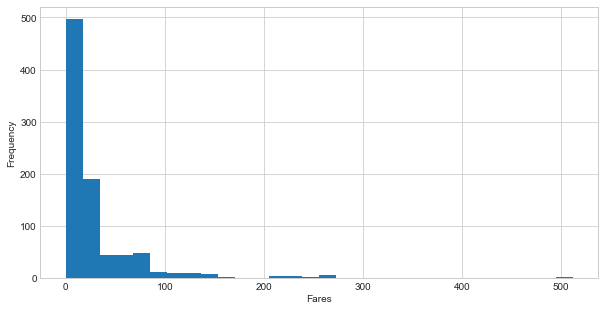

In [21]:
plt.figure(figsize=(10,5))
train_data['Fare'].plot(kind='hist', bins=30)
plt.xlabel('Fares')

** By looking above plot of Fares, it clearly seems that mostly it is distributed towards cheaper fare tickets.
   It also makes sense because most people were of Third Class who bought the tickets. **

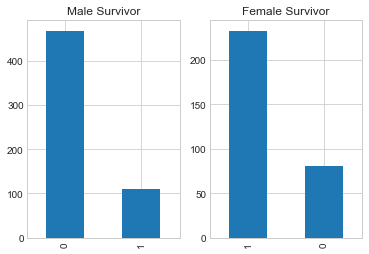

In [22]:
#Checking the Survival of male vs female
# 1 means Survived and 0 means not Survived.
fig, axes = plt.subplots(1,2)

train_data[train_data['Sex']=='male'].Survived.value_counts().plot(kind='bar', ax=axes[0], title='Male Survivor')
train_data[train_data['Sex']=='female'].Survived.value_counts().plot(kind='bar', ax=axes[1], title='Female Survivor')